In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Данные

In [2]:
df = pd.read_csv('rating.csv')
df

,Объект,KKal,Price,proteins,fats,carbohydrates,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова
0,Устрицы,72.0,85.0,9.0,2.0,4.4,4.0,NaN,NaN,NaN,9,5.0,NaN,NaN,NaN,NaN,3.0,9
1,Арахиc соленый,640.0,69.0,25.0,52.0,17.0,2.0,6.0,4.0,8.0,7,4.0,3.0,3.0,NaN,4.0,6.0,3
2,Молоко 2.5%,42.0,5.9,3.4,2.5,5.0,5.0,1.0,5.0,5.0,4,3.0,8.0,4.0,2.0,3.0,5.0,5
3,Макароны,371.0,34.0,3.6,0.4,20.0,7.0,7.0,2.0,3.0,2,8.0,4.0,6.0,3.0,5.0,NaN,6
4,Овсяное молоко 3.2%,250.0,8.0,1.0,3.2,6.5,NaN,2.0,7.0,2.0,6,7.0,5.0,5.0,7.0,NaN,7.0,7
5,Шоколад,545.0,100.0,5.0,33.0,56.5,3.0,4.0,1.0,9.0,5,NaN,1.0,1.0,6.0,6.0,1.0,2
6,"Сырок ""РОСТАГРОЭКСПОРТ""",360.7,35.6,7.7,19.1,39.5,NaN,3.0,3.0,NaN,1,2.0,6.0,2.0,1.0,1.0,2.0,8
7,Кефир 3.2%,57.0,5.9,3.0,3.2,4.0,6.0,5.0,8.0,4.0,8,1.0,7.0,7.0,4.0,7.0,NaN,1
8,Гречневая крупа,334.0,4.0,12.0,2.0,67.0,1.0,8.0,6.0,1.0,3,6.0,2.0,8.0,5.0,2.0,4.0,4


In [3]:
obj = np.array((df['Объект']))
obj[6] = 'Сырок творожный'

In [ ]:
weights = pd.read_csv('weights.csv')
# матрица оценки весов 
W = weights.values.astype(float)

### Простые рейтинги
основаны на одном из признаков и правиле tbtb


In [27]:
df['kl'] = [np.where(df.KKal.values.argsort()==i)[0][0]+1 for i in range(9)]
df['P'] = [np.where(df.Price.values.argsort()==i)[0][0]+1 for i in range(9)]
df['prot'] = [np.where(df.proteins.values.argsort()==i)[0][0]+1 for i in range(9)]
df['f'] = [np.where(df.fats.values.argsort()==i)[0][0]+1 for i in range(9)]
df['c'] = [np.where(df.carbohydrates.values.argsort()==i)[0][0]+1 for i in range(9)]
df.iloc[:,6:]

,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова,kl,P,prot,f,c
0,4.0,NaN,NaN,NaN,9,5.0,NaN,NaN,NaN,NaN,3.0,9,3,8,7,2,2
1,2.0,6.0,4.0,8.0,7,4.0,3.0,3.0,NaN,4.0,6.0,3,9,7,9,9,5
2,5.0,1.0,5.0,5.0,4,3.0,8.0,4.0,2.0,3.0,5.0,5,1,2,3,4,3
3,7.0,7.0,2.0,3.0,2,8.0,4.0,6.0,3.0,5.0,NaN,6,7,5,4,1,6
4,NaN,2.0,7.0,2.0,6,7.0,5.0,5.0,7.0,NaN,7.0,7,4,4,1,5,4
5,3.0,4.0,1.0,9.0,5,NaN,1.0,1.0,6.0,6.0,1.0,2,8,9,5,8,8
6,NaN,3.0,3.0,NaN,1,2.0,6.0,2.0,1.0,1.0,2.0,8,6,6,6,7,7
7,6.0,5.0,8.0,4.0,8,1.0,7.0,7.0,4.0,7.0,NaN,1,2,3,2,6,1
8,1.0,8.0,6.0,1.0,3,6.0,2.0,8.0,5.0,2.0,4.0,4,5,1,8,3,9


### Запонение пропусков
Используестся метод ближайших соседей (округленное среднее по 2 ближайшим соседям)

In [90]:
# Матрица с признаками объектов и оценками экспертов
A = df.iloc[:,6:].values

In [91]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
A_f = np.round(imputer.fit_transform(A[:,:-5].T).T)
A_f = np.concatenate((A[:,-5:], A_f), axis=1)
A = np.concatenate((A[:,-5:], A[:,:-5]), axis=1)

Изменение распределений по экспертам после заполнения пропусков.

2 [ 4.  2.  5.  7. nan  3. nan  6.  1.]
[4. 2. 5. 7. 6. 3. 4. 6. 1.]


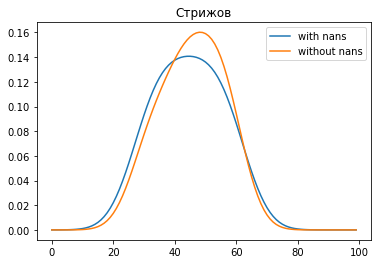

1 [nan  6.  1.  7.  2.  4.  3.  5.  8.]
[4. 6. 1. 7. 2. 4. 3. 5. 8.]


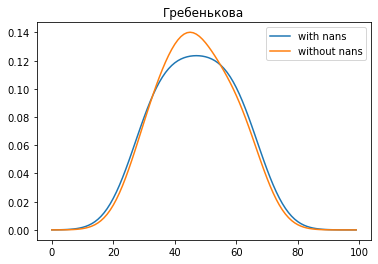

1 [nan  4.  5.  2.  7.  1.  3.  8.  6.]
[6. 4. 5. 2. 7. 1. 3. 8. 6.]


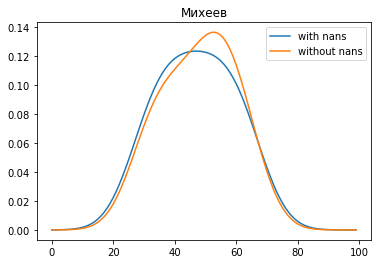

2 [nan  8.  5.  3.  2.  9. nan  4.  1.]
[6. 8. 5. 3. 2. 9. 1. 4. 1.]


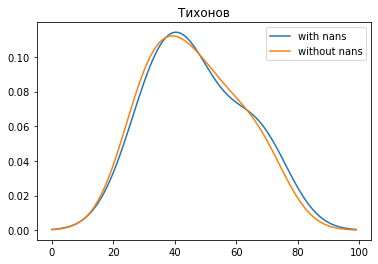

0 [9. 7. 4. 2. 6. 5. 1. 8. 3.]
[9. 7. 4. 2. 6. 5. 1. 8. 3.]


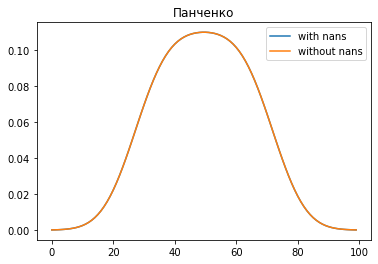

1 [ 5.  4.  3.  8.  7. nan  2.  1.  6.]
[5. 4. 3. 8. 7. 4. 2. 1. 6.]


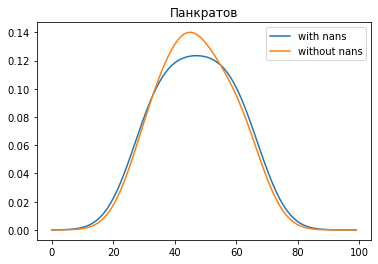

1 [nan  3.  8.  4.  5.  1.  6.  7.  2.]
[4. 3. 8. 4. 5. 1. 6. 7. 2.]


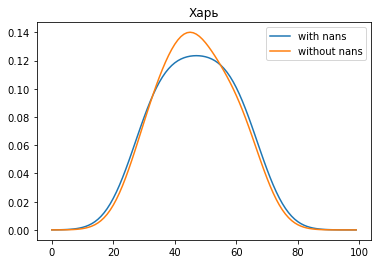

1 [nan  3.  4.  6.  5.  1.  2.  7.  8.]
[4. 3. 4. 6. 5. 1. 2. 7. 8.]


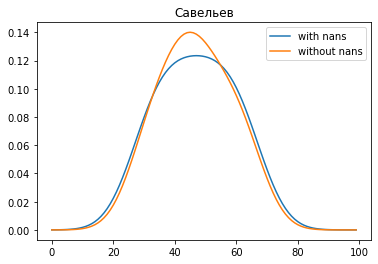

2 [nan nan  2.  3.  7.  6.  1.  4.  5.]
[7. 6. 2. 3. 7. 6. 1. 4. 5.]


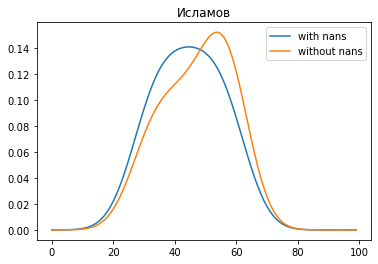

2 [nan  4.  3.  5. nan  6.  1.  7.  2.]
[6. 4. 3. 5. 6. 6. 1. 7. 2.]


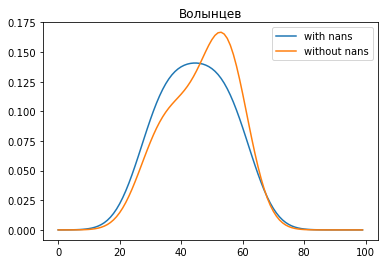

2 [ 3.  6.  5. nan  7.  1.  2. nan  4.]
[3. 6. 5. 5. 7. 1. 2. 4. 4.]


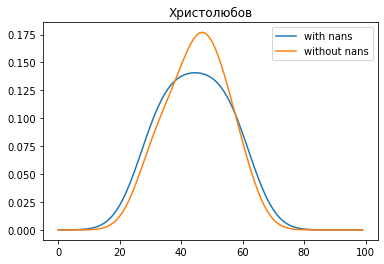

0 [9. 3. 5. 6. 7. 2. 8. 1. 4.]
[9. 3. 5. 6. 7. 2. 8. 1. 4.]


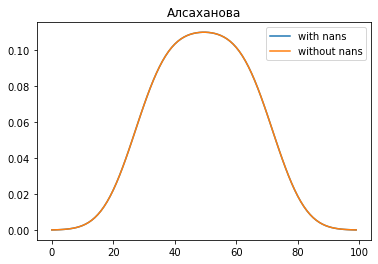

In [92]:
import scipy
from scipy.stats import entropy

entropies = []
for i in range(12):
    a = A[:,i+5]
    print(len(a[np.isnan(a)]),a)
    density_not_na = scipy.stats.gaussian_kde(a[~np.isnan(a)])
    xs = np.linspace(-5,15,100)
    dx = density_not_na(xs)
    plt.plot(dx,label='with nans')

    a_f = A_f[:,i+5]
    print(a_f)
    density_not_na = scipy.stats.gaussian_kde(a_f[~np.isnan(a_f)])
    ys = np.linspace(-5,15,100)
    dy = density_not_na(ys)
    plt.plot(dy,label='without nans')
    plt.legend()
    plt.title(df.columns[6+i])
    plt.show()
    entropies.append(entropy(pk=dx, qk=dy))

In [93]:
print('{0:20} {1}'.format("Эксперт", "Энтропия"))
for i in range(12):
    print('{0:20} {1}'.format(df.columns[6+i], entropies[i]))

Эксперт              Энтропия
Стрижов              0.016934590208828298
Гребенькова          0.006859827319815218
Михеев               0.0062451512929735265
Тихонов              0.00492890903567493
Панченко             0.0
Панкратов            0.006859827319815272
Харь                 0.0068598273198153415
Савельев             0.006859827319815229
Исламов              0.02762471996232909
Волынцев             0.026035046661266277
Христолюбов          0.02768165179253674
Алсаханова           0.0


#### Формирование критерия отказа от эксперта
Создадим нового эксперта с количеством пропусков от 1 до 8. Посмотрим, как меняется от этого энтропия.

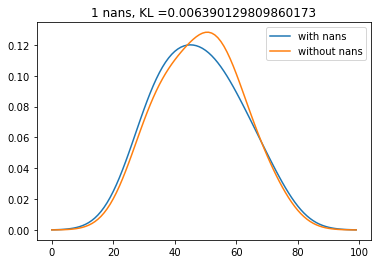

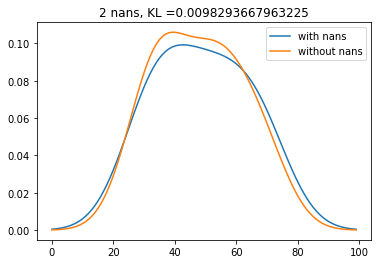

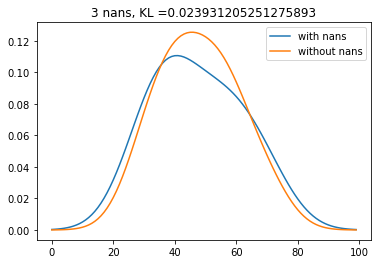

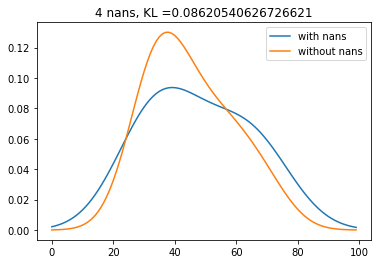

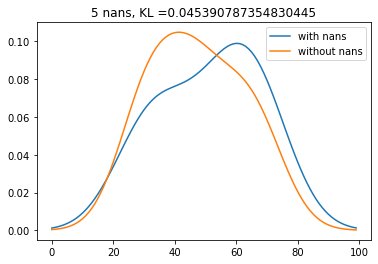

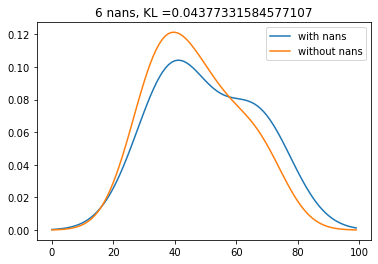

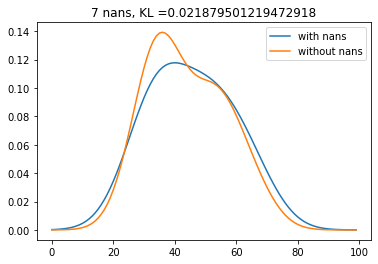

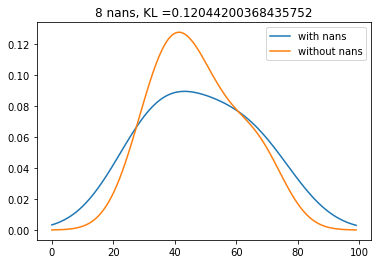

In [94]:
from matplotlib.backends.backend_pdf import PdfPages
new = np.array(np.arange(1,10),dtype='float').reshape((9,1))
for i in range(1,9):
    with PdfPages(str(i)+'Nans.pdf') as pdf:
        ind = np.random.choice(range(9),i)
        new_nan = new.copy()
        new_nan[ind] = np.nan
        A_n = np.concatenate((A_f,new_nan),axis=1)
        imputer = KNNImputer(n_neighbors=2)
        A_n = np.round(imputer.fit_transform(A_n[:,5:].T).T)
        density_not_na = scipy.stats.gaussian_kde(new_nan[~np.isnan(new_nan)])
        xs = np.linspace(-5,15,100)
        dx = density_not_na(xs)
        fig,ax = plt.subplots(1,1)
        ax.plot(dx,label='with nans')

        a_f = A_n[:,-1]
        density_not_na = scipy.stats.gaussian_kde(a_f[~np.isnan(a_f)])
        ys = np.linspace(-5,15,100)
        dy = density_not_na(ys)
        ax.plot(dy,label='without nans')
        ax.legend()
        ax.set_title(str(i)+' nans, KL ='+str(entropy(pk=dx, qk=dy)))
        pdf.savefig()
    #print('entropy =', entropy(pk=dx, qk=dy))

**Критерий:** отказываемся от эксперта, если дивергенция Кульбака-Лейблера между распределениями до заполнения пропусков и после "большая". "Большим" значением дивергенции будем считать **0.05**.

Изменение распределений по продуктам после заполнения пропусков.

7 [ 3.  8.  7.  2.  2.  4. nan nan nan  9.  5. nan nan nan nan  3.  9.]
[3. 8. 7. 2. 2. 4. 4. 6. 6. 9. 5. 4. 4. 7. 6. 3. 9.]


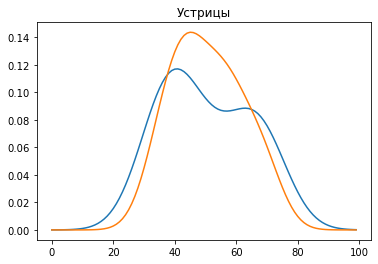

1 [ 9.  7.  9.  9.  5.  2.  6.  4.  8.  7.  4.  3.  3. nan  4.  6.  3.]
[9. 7. 9. 9. 5. 2. 6. 4. 8. 7. 4. 3. 3. 6. 4. 6. 3.]


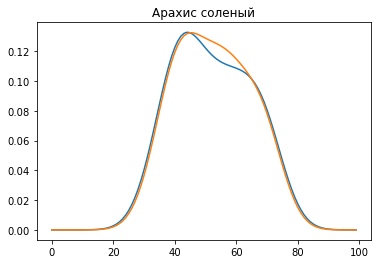

0 [1. 2. 3. 4. 3. 5. 1. 5. 5. 4. 3. 8. 4. 2. 3. 5. 5.]
[1. 2. 3. 4. 3. 5. 1. 5. 5. 4. 3. 8. 4. 2. 3. 5. 5.]


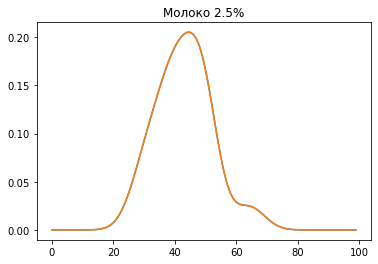

1 [ 7.  5.  4.  1.  6.  7.  7.  2.  3.  2.  8.  4.  6.  3.  5. nan  6.]
[7. 5. 4. 1. 6. 7. 7. 2. 3. 2. 8. 4. 6. 3. 5. 5. 6.]


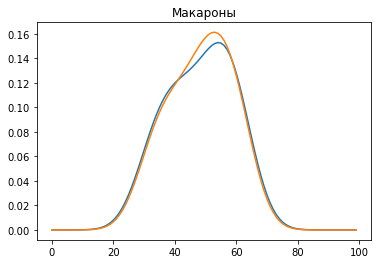

2 [ 4.  4.  1.  5.  4. nan  2.  7.  2.  6.  7.  5.  5.  7. nan  7.  7.]
[4. 4. 1. 5. 4. 6. 2. 7. 2. 6. 7. 5. 5. 7. 6. 7. 7.]


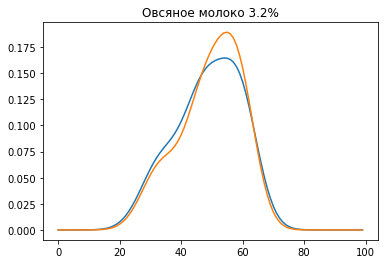

1 [ 8.  9.  5.  8.  8.  3.  4.  1.  9.  5. nan  1.  1.  6.  6.  1.  2.]
[8. 9. 5. 8. 8. 3. 4. 1. 9. 5. 4. 1. 1. 6. 6. 1. 2.]


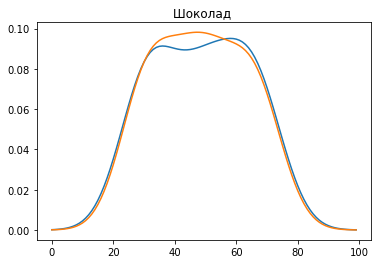

2 [ 6.  6.  6.  7.  7. nan  3.  3. nan  1.  2.  6.  2.  1.  1.  2.  8.]
[6. 6. 6. 7. 7. 4. 3. 3. 1. 1. 2. 6. 2. 1. 1. 2. 8.]


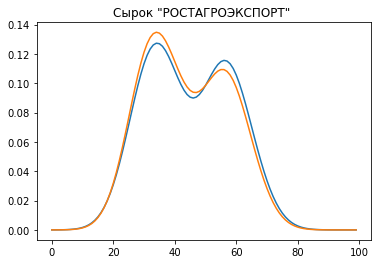

1 [ 2.  3.  2.  6.  1.  6.  5.  8.  4.  8.  1.  7.  7.  4.  7. nan  1.]
[2. 3. 2. 6. 1. 6. 5. 8. 4. 8. 1. 7. 7. 4. 7. 4. 1.]


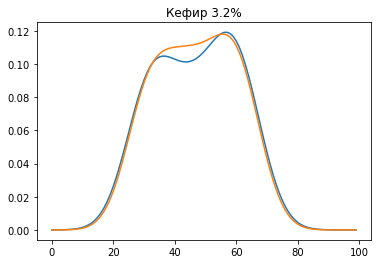

0 [5. 1. 8. 3. 9. 1. 8. 6. 1. 3. 6. 2. 8. 5. 2. 4. 4.]
[5. 1. 8. 3. 9. 1. 8. 6. 1. 3. 6. 2. 8. 5. 2. 4. 4.]


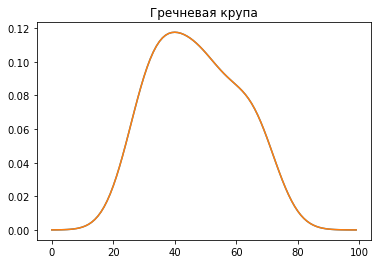

In [95]:
food_entropies = []
for i in range(9):
    a = A[i,:]
    print(len(a[np.isnan(a)]),a)
    density_not_na = scipy.stats.gaussian_kde(a[~np.isnan(a)])
    xs = np.linspace(-5,15,100)
    dx = density_not_na(xs)
    plt.plot(dx)

    a_f = A_f[i,:]
    print(a_f)
    density_not_na = scipy.stats.gaussian_kde(a_f[~np.isnan(a_f)])
    ys = np.linspace(-5,15,100)
    dy = density_not_na(ys)
    plt.plot(dy)
    plt.title(df.iloc[i,0])
    plt.show()
    food_entropies.append(entropy(dx,dy))

In [96]:
print('{0:25} {1}'.format("Продукт", "Энтропия"))
for i in range(9):
    print('{0:25} {1}'.format(df.iloc[i,0],food_entropies[i]))

Продукт                   Энтропия
Устрицы                   0.10713059638658902
Арахиc соленый            0.002024800779696148
Молоко 2.5%               0.0
Макароны                  0.0018542744052332284
Овсяное молоко 3.2%       0.007160218040336808
Шоколад                   0.002068732285488541
Сырок "РОСТАГРОЭКСПОРТ"   0.002996065531932226
Кефир 3.2%                0.0020934711902499555
Гречневая крупа           0.0


In [193]:
# Заполнение пропусков в матрице весов
imputer = KNNImputer(n_neighbors=2)
W_f = np.round(imputer.fit_transform(W.T).T)

3 пропусков
[ 6.  7.  8.  9.  5.  2. nan  2.  2.  2.  2. nan  4.  6.  2.  2. nan]
[6. 7. 8. 9. 5. 2. 4. 2. 2. 2. 2. 5. 4. 6. 2. 2. 2.]


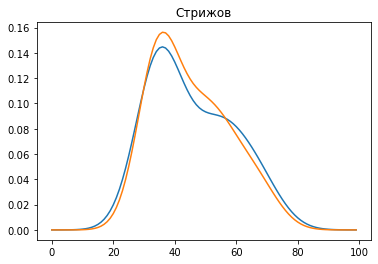

0 пропусков
[ 3.  8.  9.  7.  5.  5. 10.  3.  3.  3.  3. 10. 10. 10.  3.  3.  3.]
[ 3.  8.  9.  7.  5.  5. 10.  3.  3.  3.  3. 10. 10. 10.  3.  3.  3.]


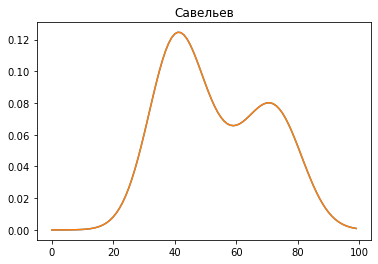

0 пропусков
[ 9.  9.  9.  9.  9.  1.  9.  1.  1.  1. 10. 10. 10. 10.  1. 10.  1.]
[ 9.  9.  9.  9.  9.  1.  9.  1.  1.  1. 10. 10. 10. 10.  1. 10.  1.]


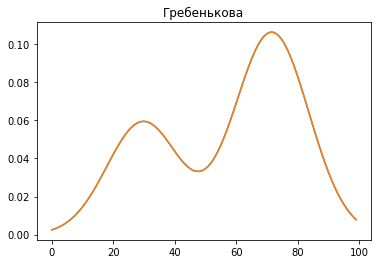

0 пропусков
[ 3.  6.  5.  7.  7. 10.  3. 10.  2.  8.  3.  4. 10.  6.  1.  1.  1.]
[ 3.  6.  5.  7.  7. 10.  3. 10.  2.  8.  3.  4. 10.  6.  1.  1.  1.]


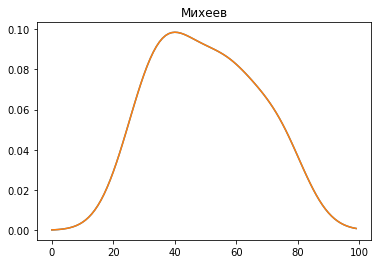

0 пропусков
[10.  4.  6.  1.  8.  8.  5.  3.  5.  4.  9.  4.  2.  1.  4.  4.  9.]
[10.  4.  6.  1.  8.  8.  5.  3.  5.  4.  9.  4.  2.  1.  4.  4.  9.]


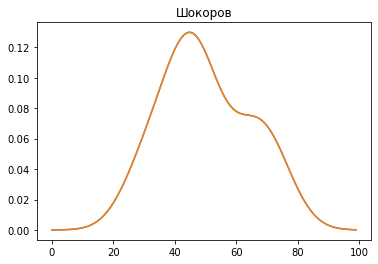

0 пропусков
[7. 8. 9. 5. 6. 5. 5. 5. 5. 6. 5. 5. 5. 5. 5. 5. 5.]
[7. 8. 9. 5. 6. 5. 5. 5. 5. 6. 5. 5. 5. 5. 5. 5. 5.]


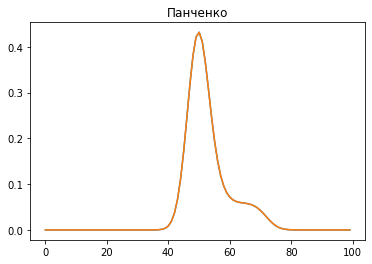

0 пропусков
[ 7.  8. 10.  9.  6.  5.  4.  5.  4.  5.  4.  5.  4.  5.  4.  5.  4.]
[ 7.  8. 10.  9.  6.  5.  4.  5.  4.  5.  4.  5.  4.  5.  4.  5.  4.]


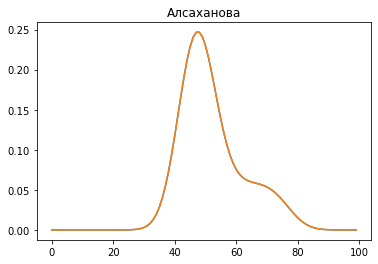

2 пропусков
[10. 10.  7.  9.  6. nan  5.  1.  1.  1. nan  5.  5.  5.  1.  5.  1.]
[10. 10.  7.  9.  6.  4.  5.  1.  1.  1.  3.  5.  5.  5.  1.  5.  1.]


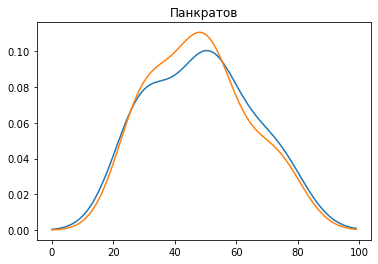

0 пропусков
[ 1. 10. 10.  2.  3.  4. 10.  6.  7.  8.  9. 10. 10. 10.  9.  8.  7.]
[ 1. 10. 10.  2.  3.  4. 10.  6.  7.  8.  9. 10. 10. 10.  9.  8.  7.]


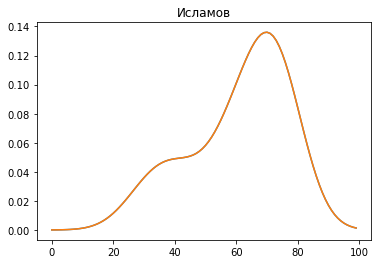

0 пропусков
[10. 10. 10. 10. 10.  3.  5.  4.  5.  7.  7.  5.  6.  8. 10.  5.  4.]
[10. 10. 10. 10. 10.  3.  5.  4.  5.  7.  7.  5.  6.  8. 10.  5.  4.]


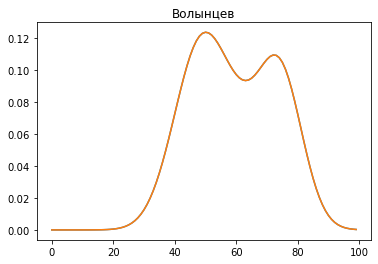

0 пропусков
[10. 10. 10. 10. 10.  7.  8.  7.  7.  5.  5.  5.  7.  8.  7.  6.  5.]
[10. 10. 10. 10. 10.  7.  8.  7.  7.  5.  5.  5.  7.  8.  7.  6.  5.]


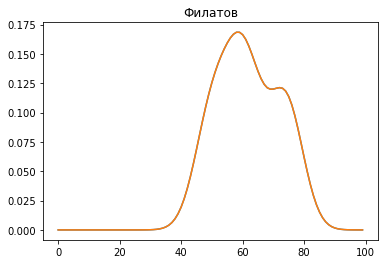

0 пропусков
[8. 3. 7. 7. 7. 4. 5. 6. 4. 5. 6. 4. 5. 6. 4. 5. 6.]
[8. 3. 7. 7. 7. 4. 5. 6. 4. 5. 6. 4. 5. 6. 4. 5. 6.]


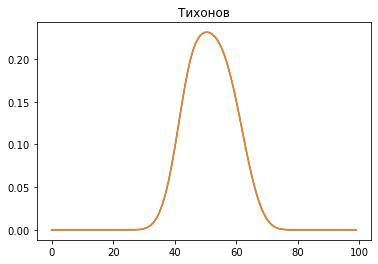

0 пропусков
[10. 10.  9.  9.  9.  3. 10.  3.  3.  3.  3. 10. 10. 10.  3.  3.  3.]
[10. 10.  9.  9.  9.  3. 10.  3.  3.  3.  3. 10. 10. 10.  3.  3.  3.]


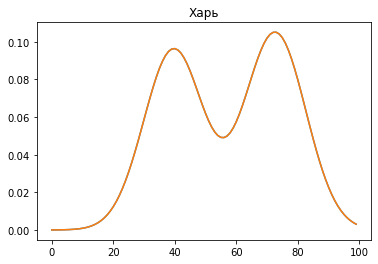

0 пропусков
[10. 10. 10. 10. 10.  8.  8.  5.  5.  5.  5.  7.  7. 10.  5.  7.  5.]
[10. 10. 10. 10. 10.  8.  8.  5.  5.  5.  5.  7.  7. 10.  5.  7.  5.]


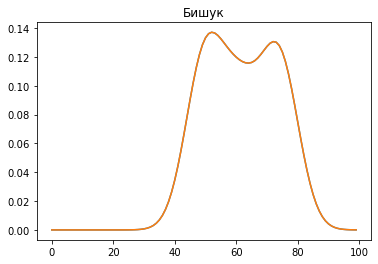

0 пропусков
[10. 10. 10. 10.  9.  8.  8.  5.  5.  5.  6.  7.  8.  9.  8.  7.  5.]
[10. 10. 10. 10.  9.  8.  8.  5.  5.  5.  6.  7.  8.  9.  8.  7.  5.]


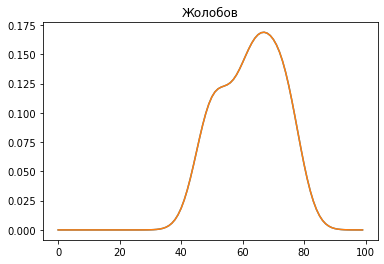

0 пропусков
[ 8. 10.  8. 10.  8.  8. 10.  7.  5. 10.  3.  7.  3.  4. 10.  6.  7.]
[ 8. 10.  8. 10.  8.  8. 10.  7.  5. 10.  3.  7.  3.  4. 10.  6.  7.]


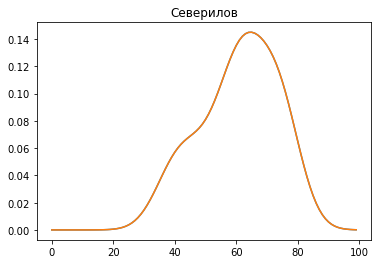

0 пропусков
[10. 10. 10. 10. 10.  7.  6.  4.  4.  4.  5.  7.  7.  9.  5.  7.  4.]
[10. 10. 10. 10. 10.  7.  6.  4.  4.  4.  5.  7.  7.  9.  5.  7.  4.]


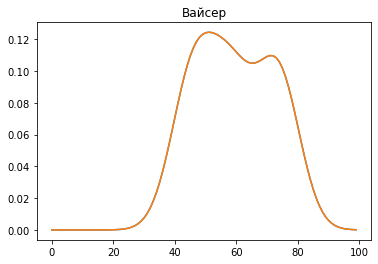

0 пропусков
[10. 10. 10. 10. 10.  8.  8.  8.  5.  5.  5.  7.  7.  9.  8.  7.  7.]
[10. 10. 10. 10. 10.  8.  8.  8.  5.  5.  5.  7.  7.  9.  8.  7.  7.]


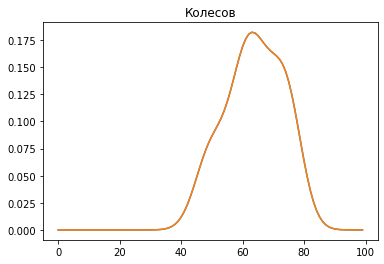

In [40]:
w_entropies = []
for i in range(18):
    w = W[:,i]
    print('{} пропусков'.format(len(w[np.isnan(w)])))
    print(w)
    density_not_na = scipy.stats.gaussian_kde(w[~np.isnan(w)])
    xs = np.linspace(-5,15,100)
    dx = density_not_na(xs)
    plt.plot(dx)

    w_f = W_f[:,i]
    print(w_f)
    density_not_na = scipy.stats.gaussian_kde(w_f[~np.isnan(w_f)])
    ys = np.linspace(-5,15,100)
    dy = density_not_na(ys)
    plt.plot(dy)
    plt.title(weights.columns[i])
    plt.show()
    w_entropies.append(entropy(dx,dy))

In [41]:
print('{0:25} {1}'.format("Эксперт", "Энтропия (распределения весов)"))
for i in range(18):
    if w_entropies[i] != 0.:
        print('{0:25} {1}'.format(weights.columns[i],w_entropies[i]))

Эксперт                   Энтропия (распределения весов)
Стрижов                   0.010401940400794455
Панкратов                 0.0073897613009848585


Text(0.5, 0, 'median')

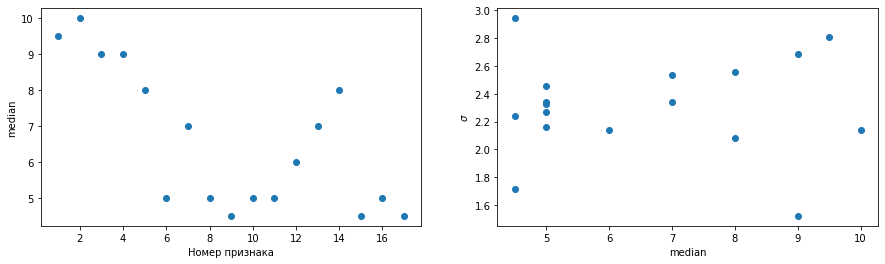

In [50]:
std_w = W_f.std(axis=1)
mean_w = np.median(W_f,axis=1)
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].scatter(np.arange(1,18), mean_w,label='mean')
ax[0].set_xlabel(r'Номер признака')
ax[0].set_ylabel(r'median')
ax[1].scatter(mean_w, std_w,label='std')
ax[1].set_ylabel(r'$\sigma$')
ax[1].set_xlabel(r'median')

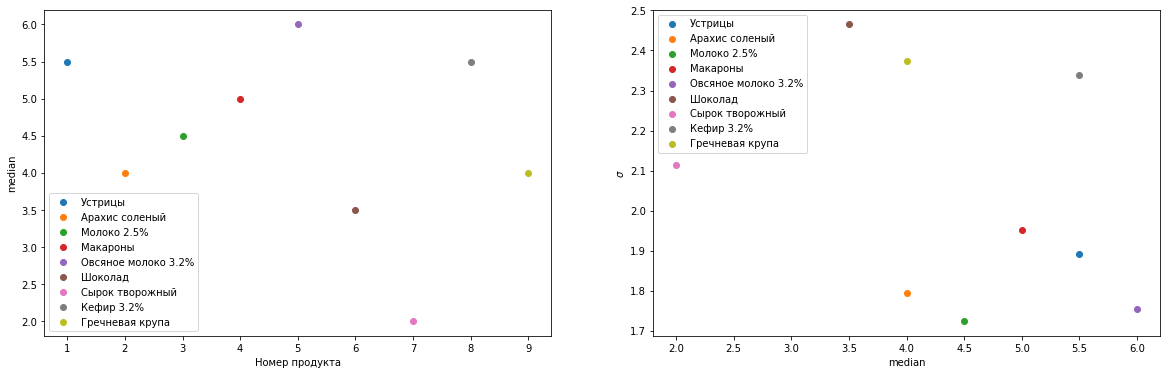

In [48]:
std_q = A_f[:,5:].std(axis=1)
mean_q = np.median(A_f[:,5:],axis=1)
fig,ax = plt.subplots(1,2,figsize=(20,6))
for k in range(9):
    ax[0].scatter(np.arange(1,10)[k],mean_q[k],label=obj[k])
    ax[1].scatter(mean_q[k], std_q[k],label=obj[k])
ax[0].set_xlabel(r'Номер продукта')
ax[0].set_ylabel(r'median')
ax[1].set_ylabel(r'$\sigma$')
ax[1].set_xlabel(r'median')
ax[0].legend()
ax[1].legend()

### Линейное согласование

Функция линейного согласования, основанная на формулах:
$$ q_\alpha = \alpha q_0 + (1 − \alpha) A w_0 $$ 
$$ w_\alpha = (1 − \alpha) w_0 + \alpha A^+q_0 $$
Где $\alpha \in [0,1]$ - параметр доверия экспертным оценкам объектов, либо весов. При $\alpha = 0$ мы игнорируем экспертные оценки объектов, при $\alpha = 1$ мы игнорируем экспертные оценки весов.

In [100]:
def lin_agreement(A,q0,w0,alpha):
    A_inv = np.linalg.pinv(A)
    q_a = alpha*q0 + (1 - alpha)*A@w0 
    #q_a = np.array([np.where(q_a.argsort()==i)[0][0]+1 for i in range(9)])
    w_a = (1 - alpha)*w0 + alpha*A_inv@q0
    return q_a, w_a

#### Подбор $\alpha$
$$Q_\alpha = \frac{1}{n} \| w_\alpha - w_0 \|^2_2 + \frac{1}{m} \| q_\alpha - q_0 \|^2_2$$
$$\alpha^* = arg \min_{\alpha} \bigl\{ Q_\alpha \bigl\}$$

Чтобы проводить линейное согласование нужно перевести в вещественной пространство матрицу $Q$. Для этого предлагается использовать простые рейтинги, полученные из вещественных признаков продуктов $Pr$, и корреляцию Кенделла:
$$\tau=1-\frac{4}{n(n-1)}R$$
где $$R = \sum_{i=1}^{n-1}\sum_{j=i+1}^n\left[ \left[ x_i\ <\ x_j \right] \neq \left[ y_i\ <\ y_j \right] \right]$$
Получаем вещественные признаки из оценок экспертов с помощью формулы:
$$ \hat{Q_i} = \sum_{j=1}^p \tau(Pr_j,Q_i) * P_j $$
где $p$ - количество вещественных признаков, $P_j$ - столбец значений вещественного признака, а $Pr_j$ - его простой рейтинг.

In [273]:
# матрица с вещественными признаками
Prod = df.iloc[:,1:6].values.astype(float)
Prod = (Prod - Prod.min(axis=0)) / (Prod.max(axis=0)-Prod.min(axis=0))

In [238]:
Q = np.zeros((9,12))
for i in range (5):
    for j in range (12):
        tau, _ = kendalltau(A_f[:,5+j],A_f[:,i])
        Q[:,j] += tau * Prod[:,i]
Q = np.abs(Q - np.abs(Q).min(axis=0)) / (Q.max(axis=0)-Q.min(axis=0))

In [239]:
# для полученной матрицы берем среднее значение, получаем q_0, из матрицы весов тоже берем среднее и получаем w_0
q_0,w_0 = Q.mean(axis=1), W_f.mean(axis=1)

In [240]:
# формируем матрицу вещественных признаков
A_n = np.concatenate((Prod,Q),axis=1)

In [241]:
e,d = [],[]
for alpha in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    q_a,w_a = lin_agreement(A_n,q_0/np.sum(q_0),w_0/np.sum(w_0),alpha)
    e.append(sum((q_0-q_a)**2)/q_a.shape[0])
    d.append(sum((w_0/np.sum(w_0)-w_a)**2)/w_a.shape[0])

In [242]:
e,d = np.array(e),np.array(d)
alpha = ((e-d).argmin()+1)/10
q_a,w_a = lin_agreement(A_n,q_0/np.sum(q_0),w_0/np.sum(w_0),alpha)

По правилу tbtb переводим $q_\alpha$ обратно

In [206]:
q_a_r = [9-np.where(q_a.argsort()==i)[0][0] for i in range(9)]
q_a_r

[5, 1, 9, 6, 7, 2, 4, 8, 3]

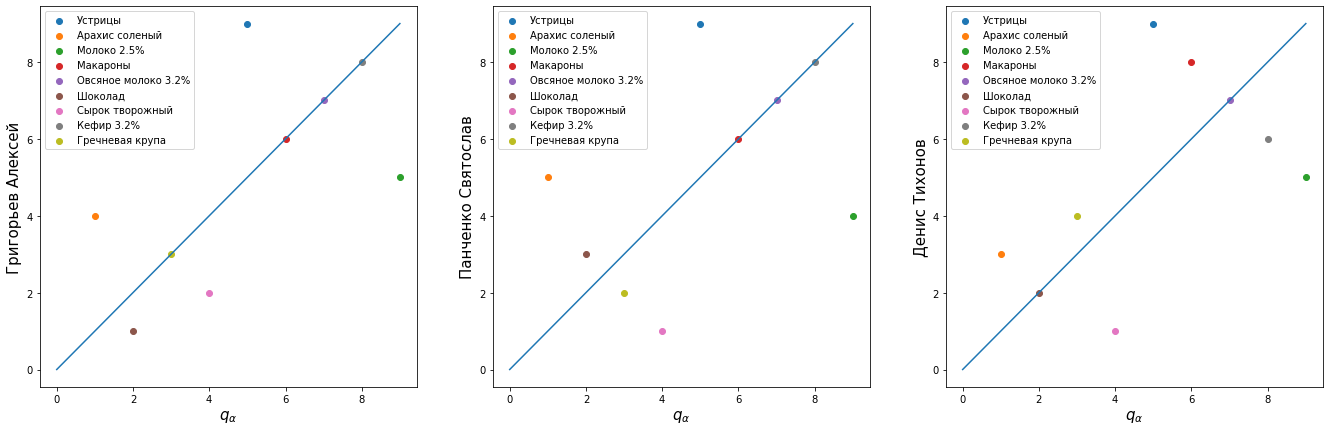

In [207]:
from matplotlib.backends.backend_pdf import PdfPages
q_ar = [5, 1, 9, 6, 7, 2, 4, 8, 3]
q = [[9,4,5,6,7,1,2,8,3], [9,5,4,6,7,3,1,8,2], [9, 3, 5, 8, 7, 2, 1, 6, 4]]
names = ['Григорьев Алексей','Панченко Святослав', 'Денис Тихонов']
fig,ax = plt.subplots(1,3,figsize=(23,7))
with PdfPages('Rating1.pdf') as pdf:
    for i in range(3):
        for k in range(9):
            ax[i].scatter(q_ar[k],q[i][k],label=obj[k])
        ax[i].legend()
        ax[i].plot([0,9],[0,9])
        ax[i].set_ylabel(names[i],size=15)
        ax[i].set_xlabel(r'$q_{\alpha}$',size=15)
    pdf.savefig()

# Учет предпочтения экспертов
Пусть у нас есть свое предпочтение экспертов. 

In [259]:
r_exp = np.array([ 1,  9, 10,  3,  8,  7,  5, 12,  6,  2, 11,  4]) # ранжирование экспертов, ниже значение - лучше эксперт
# поменяем порядок для следующего шага
r_exp = np.array([abs(np.where(r_exp.argsort()==i)[0][0]-11)*150 for i in range(12)]) # ранжирование экспертов, выше значение - лучше эксперт 

In [266]:
q_0

array([0.30276775, 0.76035469, 0.04863763, 0.29697348, 0.13521591,
       0.65207731, 0.43958844, 0.05121095, 0.61049645])

Чтобы учесть данный рейтиг экспертов, предлагается считать взвешанную сумму вместо среднего для получения $q_0$.

In [267]:
q_0,w_0 = (Q@r_exp[...,None]/sum(r_exp)).reshape(-1), W_f.mean(axis=1)

In [268]:
e,d = [],[]
for alpha in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    q_a,w_a = lin_agreement(A_n,q_0/np.sum(q_0),w_0/np.sum(w_0),alpha)
    e.append(sum((q_0-q_a)**2)/q_a.shape[0])
    d.append(sum((w_0/np.sum(w_0)-w_a)**2)/w_a.shape[0])

In [269]:
e,d = np.array(e),np.array(d)
alpha = ((e-d).argmin()+1)/10
q_a,w_a = lin_agreement(A_n,q_0/np.sum(q_0),w_0/np.sum(w_0),alpha+0.2)

In [270]:
q_a_r_n = [9-np.where(q_a.argsort()==i)[0][0] for i in range(9)]
q_a_r_n

[5, 1, 9, 6, 7, 2, 4, 8, 3]

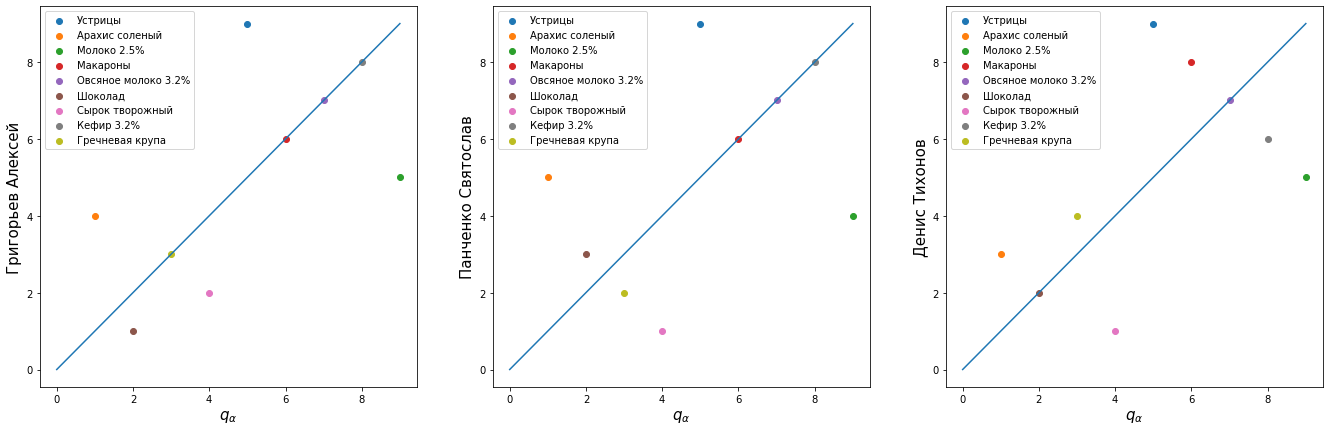

In [271]:
q = [[9,4,5,6,7,1,2,8,3], [9,5,4,6,7,3,1,8,2], [9, 3, 5, 8, 7, 2, 1, 6, 4]]
names = ['Григорьев Алексей','Панченко Святослав', 'Денис Тихонов']
fig,ax = plt.subplots(1,3,figsize=(23,7))
with PdfPages('Rating2.pdf') as pdf:
    for i in range(3):
        for k in range(9):
            ax[i].scatter(q_a_r_n[k],q[i][k],label=obj[k])
        ax[i].legend()
        ax[i].plot([0,9],[0,9])
        ax[i].set_ylabel(names[i],size=15)
        ax[i].set_xlabel(r'$q_{\alpha}$',size=15)
    pdf.savefig()

### Сравнение результатов до и после учета рейтинга экспертов

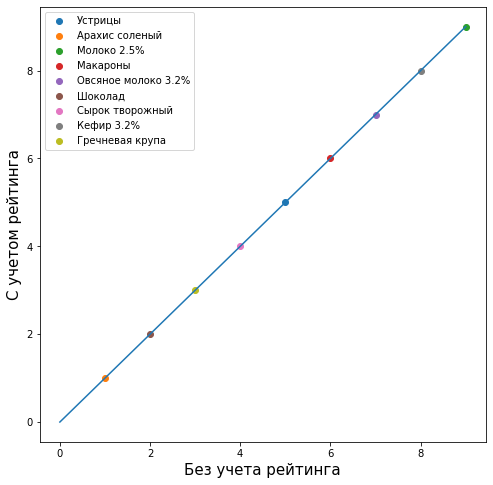

In [272]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
with PdfPages('rating_ch.pdf') as pdf:
    for k in range(9):
        ax.scatter(q_a_r_n[k],q_a_r[k],label=obj[k])
    ax.legend()
    ax.plot([0,9],[0,9])
    ax.set_xlabel('Без учета рейтинга',size=15)
    ax.set_ylabel(r'С учетом рейтинга',size=15)
    pdf.savefig()